1. DATA LOADING, VALIDATION AND CLEANING

This dataset has 947 rows and 8 columns. I have validated all variables and I have made several changes after validation.

recipe: 947 unique values without missing values. this column act as index for each recipe

calories: 895 unique values with 52 missing values,

carbohydrate: 895 unique values with 52 missing values

sugar: 895 unique values with 52 missing values

protein: 895 unique values with 52 missing values

category: 11 unique values without missing values

servings: 6 unique value with no missing values but we need to explore this because the data is not numerical

high_traffic: 1 unique value with 373 missing values. the missing values are the low traffic we need to fix this.

 I handled missing values: I checked for missing values in the dataset and handled them appropriately. I handled outliers using various techniques to detect and handle outliers in the dataset. I also added new features, making new features depending on the information gained from the data to support my insights


In [175]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [176]:
# Load the data
file_path = r'C:\Users\Katlego\Downloads\recipe_site_traffic_2212.csv'
try:
    recipe_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please provide the correct file path.")

Data loaded successfully.


In [177]:
# Validate data shape and columns
print("Data Shape:", recipe_data.shape)
print("Column Names:", recipe_data.columns)

Data Shape: (947, 8)
Column Names: Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')


In [178]:
#checking first 5 rows of the dataframe
recipe_data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [179]:
# Check for missing values
print("Missing Values:")
print(recipe_data.isnull().sum())

Missing Values:
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


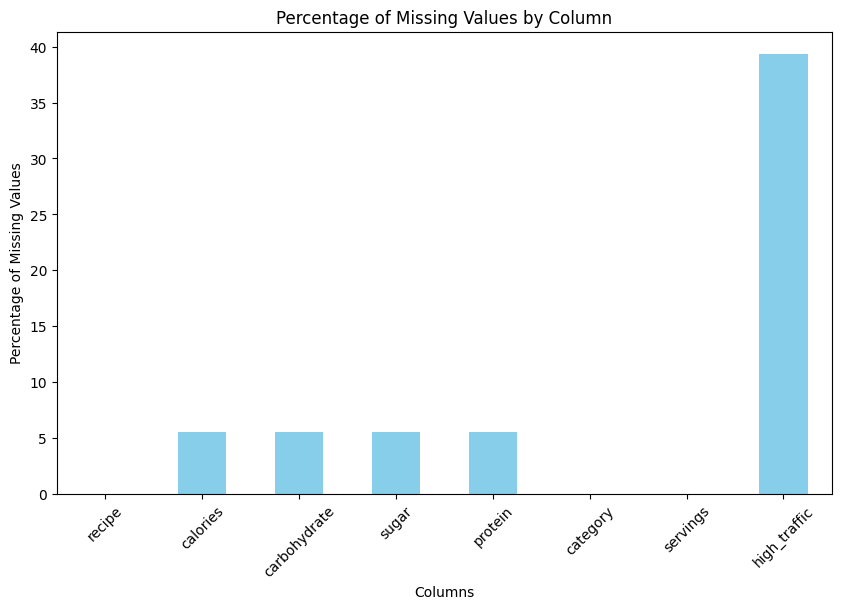

In [180]:
missing_values_count = recipe_data.isnull().sum()
missing_values_percentage = (missing_values_count / len(recipe_data)) * 100

plt.figure(figsize=(10, 6))
missing_values_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
plt.xticks(rotation=45)
plt.show()

In [181]:
# Initial exploration and validation
print("Initial info:")
print(recipe_data.info())

Initial info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


In [182]:

# validate recipe
recipe_data['recipe'].nunique()

947

In [183]:
# validate recipe
recipe_data['calories'].nunique()

891

In [184]:
# validate recipe
recipe_data['carbohydrate'].nunique()

835

In [185]:
# validate recipe
recipe_data['sugar'].nunique()

666

In [186]:
# validate recipe
recipe_data['protein'].nunique()

772

In [187]:
# validate recipe
recipe_data['category'].nunique()

11

In [188]:
# validate recipe
recipe_data['servings'].nunique()

6

In [189]:
# validate recipe
recipe_data['high_traffic'].nunique()

1

In [190]:
recipe_data['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [191]:
recipe_data['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [192]:
nutrition = ['calories', 'carbohydrate', 'sugar', 'protein']
num_names = nutrition + ['servings']

nutrition_1 = ['calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving']
num_names_1 = nutrition_1 + ['servings']

In [193]:
# recipe_data[recipe_data['calories'].isna()].groupby(['category', 'servings'])['recipe'].count()

In [194]:
# create new dataframe for changing values and columns
# remove all recipes with null values in calories, carbohydrate, sugar and protein columns
# recipe_data1 = recipe_data[recipe_data['calories'].notna()]
recipe_data1 = recipe_data[list(recipe_data)]

In [195]:
# df["value"] = df.groupby(["category","servings"]).transform(lambda x: x.fillna(x.mean()))
for name in nutrition: 
    recipe_data1[name] = recipe_data1[name].fillna(recipe_data.groupby(["category","servings"])[name].transform('mean'))
recipe_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [196]:
# still 11 unique values
recipe_data1['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [197]:
# still 6 unique values
recipe_data1['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [198]:
recipe_data1.groupby(['servings'])['category'].count()

servings
1               175
2               183
4               389
4 as a snack      2
6               197
6 as a snack      1
Name: category, dtype: int64

There are only 2 and 1 recipes of "4 as a snack" and "6 as a snack" servings, so I'll rename them to "4" and "6" for simplicity and convert to numerical.

DATA CLEANING AND TRANSFORMATION 

In [199]:
recipe_data1['servings'] = recipe_data1['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'}).astype('int')
recipe_data1.groupby(['servings'])['recipe'].count()

servings
1    175
2    183
4    391
6    198
Name: recipe, dtype: int64

In [200]:
recipe_data1['category'] =recipe_data1['category'].replace({"Chicken Breast": 'Chicken'})
recipe_data1.groupby(['category'])['recipe'].count()

category
Beverages         92
Breakfast        106
Chicken          172
Dessert           83
Lunch/Snacks      89
Meat              79
One Dish Meal     71
Pork              84
Potato            88
Vegetable         83
Name: recipe, dtype: int64

In [201]:
# replace null values of high_traffic with Low
recipe_data1['high_traffic'] = recipe_data1['high_traffic'].fillna("Low")
recipe_data1.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,764.641333,20.072,7.013333,66.528,Pork,6,High
1,2,35.480000,38.560,0.660000,0.920,Potato,4,High
2,3,914.280000,42.680,3.090000,2.880,Breakfast,1,Low
3,4,97.030000,30.560,38.630000,0.020,Beverages,4,High
4,5,27.050000,1.850,0.800000,0.530,Beverages,4,Low


In [202]:
# added new column
# Feature engineering

for name in nutrition:
    recipe_data1[name + '_per_serving'] = recipe_data1[name] * recipe_data1['servings']
    print("Feature engineering completed. New columns added.")

Feature engineering completed. New columns added.
Feature engineering completed. New columns added.
Feature engineering completed. New columns added.
Feature engineering completed. New columns added.


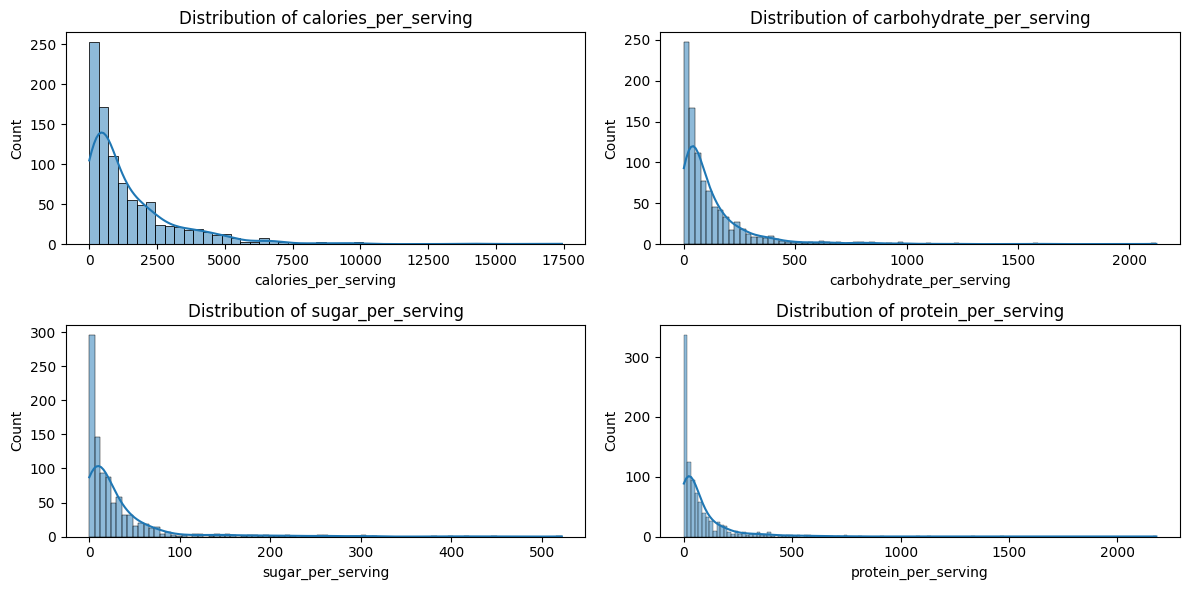

In [203]:
# Visualization: Distribution of new features
plt.figure(figsize=(12, 6))
for i, col in enumerate([col + '_per_serving' for col in nutrition]):
    plt.subplot(2, 2, i+1)
    sns.histplot(recipe_data1[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [204]:
recipe_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   recipe                    947 non-null    int64  
 1   calories                  947 non-null    float64
 2   carbohydrate              947 non-null    float64
 3   sugar                     947 non-null    float64
 4   protein                   947 non-null    float64
 5   category                  947 non-null    object 
 6   servings                  947 non-null    int64  
 7   high_traffic              947 non-null    object 
 8   calories_per_serving      947 non-null    float64
 9   carbohydrate_per_serving  947 non-null    float64
 10  sugar_per_serving         947 non-null    float64
 11  protein_per_serving       947 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 88.9+ KB


In [205]:
# drop recipe, because it's an id and it's useless for exploratory analysis and classification.
recipe_data1 = recipe_data1.drop('recipe', axis=1)

In [206]:
#validate any negative values in numeric variables
recipe_data1.describe()

,calories,carbohydrate,sugar,protein,servings,calories_per_serving,carbohydrate_per_serving,sugar_per_serving,protein_per_serving
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,439.210748,35.144413,9.060182,24.567001,3.477297,1507.228977,120.477181,31.177385,85.318466
std,442.354374,42.908525,14.448921,35.759721,1.732741,1863.729100,174.303334,53.908431,156.383007
min,0.140000,0.030000,0.010000,0.000000,1.000000,0.280000,0.100000,0.060000,0.000000
25%,114.410000,9.135000,1.795000,3.465000,2.000000,318.690000,24.250000,4.410000,9.595000
50%,306.900000,22.350000,4.720000,11.200000,4.000000,816.250000,62.720000,13.800000,35.280000
75%,598.995000,44.825000,9.565000,32.275000,4.000000,2060.640000,148.540000,33.900000,92.300000
max,3633.160000,530.420000,148.750000,363.360000,6.000000,17436.060000,2121.680000,521.820000,2180.160000


In [207]:
recipe_data1.drop_duplicates().shape

(924, 11)

In [208]:
# Impute missing values for nutrition columns
nutrition = ['calories', 'carbohydrate', 'sugar', 'protein']
recipe_data1[nutrition] = recipe_data1[nutrition].fillna(recipe_data1[nutrition].mean())

In [209]:
# Checking the values of high_traffic column again
print(recipe_data1['high_traffic'].value_counts())

high_traffic
High    574
Low     373
Name: count, dtype: int64


Handling Missing Values: Fills missing values for nutrition columns with their mean and replaces missing values in 'high_traffic' with 'Low'.
Data Transformation and Feature Engineering: Converts 'servings' to integer, performs feature engineering by creating new features based on numerical columns.

In [210]:
# Check for missing values in the entire dataframe
missing_values = recipe_data1.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 calories                    0
carbohydrate                0
sugar                       0
protein                     0
category                    0
servings                    0
high_traffic                0
calories_per_serving        0
carbohydrate_per_serving    0
sugar_per_serving           0
protein_per_serving         0
dtype: int64


In [211]:
# Find rows with missing values
rows_with_missing = recipe_data1[recipe_data1.isnull().any(axis=1)]


In [212]:
# Display the rows with missing values
if not rows_with_missing.empty:
    print("\nRows with Missing Values:\n", rows_with_missing)
else:
    print("\nNo rows with missing values found.")



No rows with missing values found.


3. EXPLORATORY DATA ANALYSIS (EDA)

For each serving, the amount of recipes with high traffic are more than the amount of recipes with low traffic,

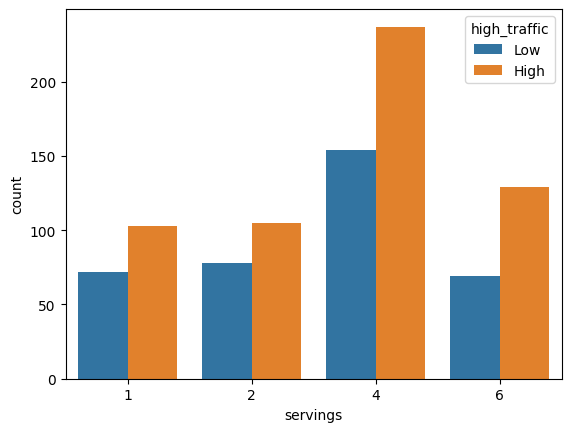

In [213]:
sns.countplot(recipe_data1, x="servings", hue="high_traffic")
plt.show()

Potato, Pork and Vegetable categories have a lot more recipes with high traffic than with low traffic.

One Dish Meal, Lunch/Snacks, Meat, Dessert categories have just more recipes with high traffic than with low traffic.

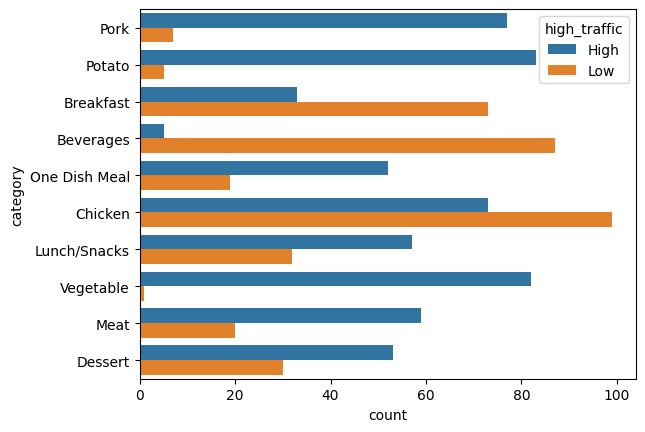

In [214]:
sns.countplot(recipe_data1, y="category", hue="high_traffic")
# plt.xticks(rotation=90)
plt.show()

From the bar charts below, we can see the most frequent categories in servings, category, high_traffic variables in the dataset.

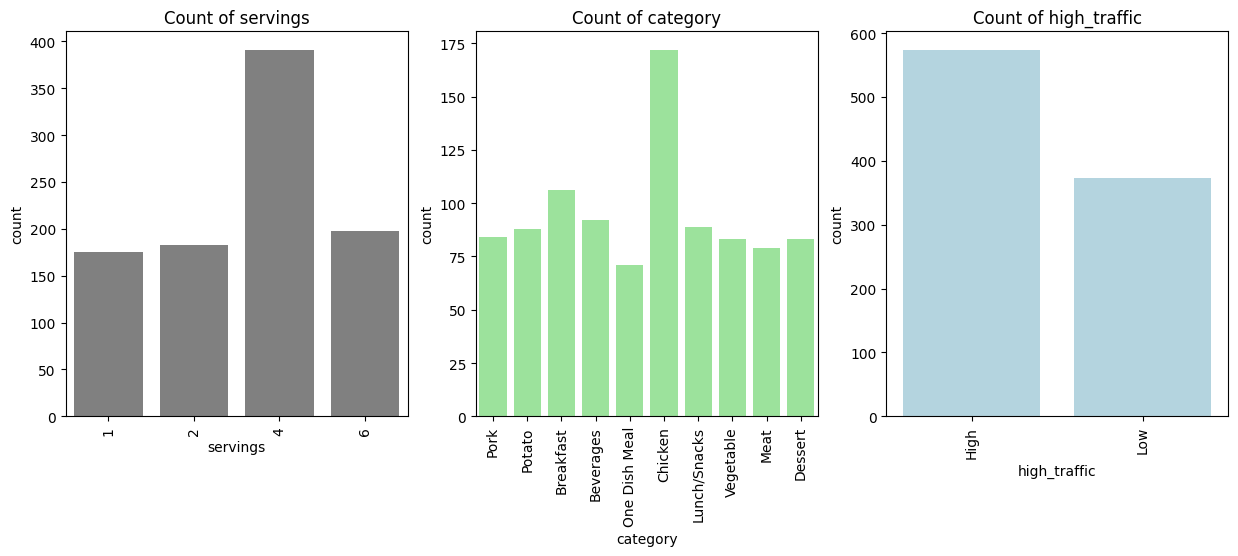

In [215]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x=recipe_data1['servings'], color='gray', ax=axes[0]).set(title='Count of servings')
sns.countplot(x=recipe_data1['category'], color='lightgreen', ax=axes[1]).set(title='Count of category')
sns.countplot(x=recipe_data1['high_traffic'], color='lightblue', ax=axes[2]).set(title='Count of high_traffic')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

From the heatmap below, we can conclude that there is a moderate linear negative relationship in 5 variables - calories, carbohydrate, sugar, protein, servings. All values are close to 0, so they are weakly connected.

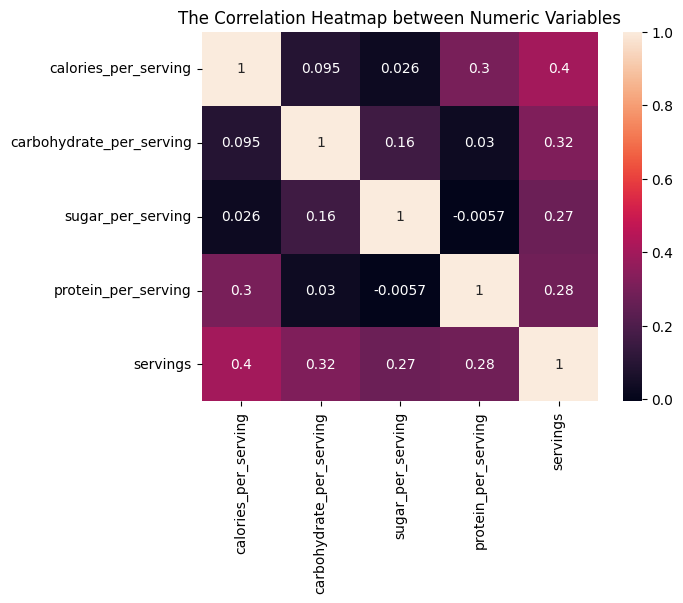

In [216]:
numeric = recipe_data1[num_names_1]
sns.heatmap(numeric.corr(), annot=True).set(title='The Correlation Heatmap between Numeric Variables');

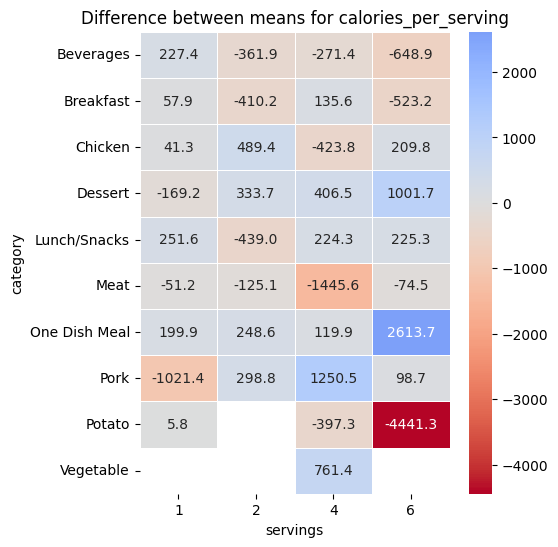

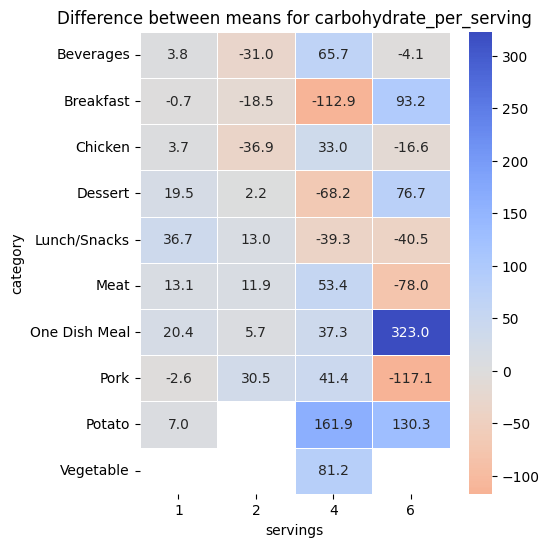

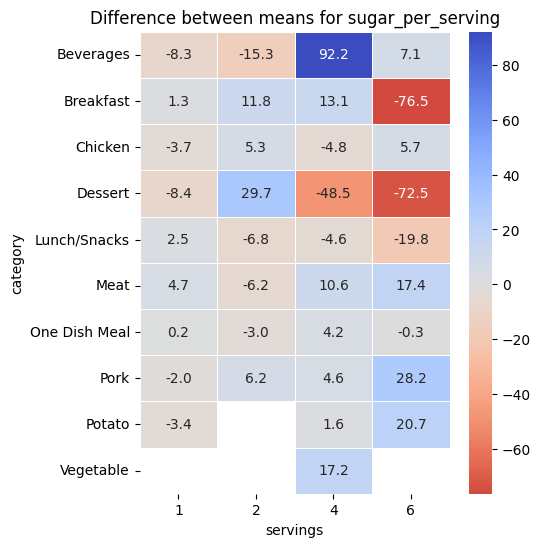

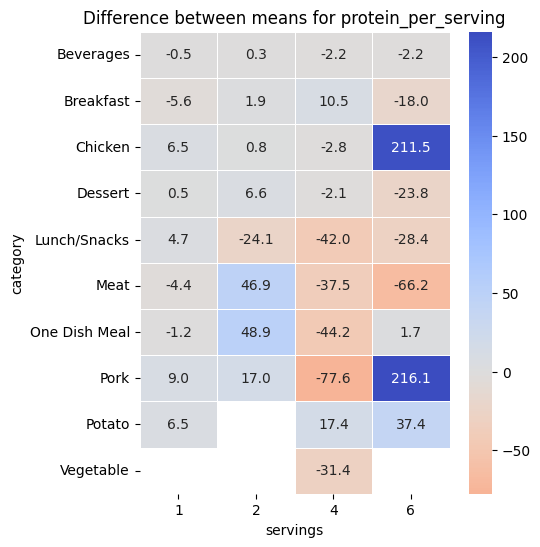

In [223]:
def diff_for_numerical(recipe_data1, name):
    # Pivot tables with aggregation function specified as a string
    recipe_data1_high_agg = pd.pivot_table(
        recipe_data1[recipe_data1['high_traffic'] == 'High'],
        index=["category"],
        columns=["servings"],
        values=name,
        aggfunc="mean"  # Use string "mean" instead of np.mean
    )

    recipe_data1_low_agg = pd.pivot_table(
        recipe_data1[recipe_data1['high_traffic'] == 'Low'],
        index=["category"],
        columns=["servings"],
        values=name,
        aggfunc="mean"  # Use string "mean" instead of np.mean
    )

    # Calculate the difference between high and low traffic
    recipe_data1_diff = recipe_data1_high_agg.subtract(recipe_data1_low_agg)
    
    # Plot the heatmap
    f, ax = plt.subplots(figsize=(5, 6))
    sns.heatmap(
        recipe_data1_diff,
        annot=True,
        fmt=".1f",
        linewidths=.5,
        ax=ax,
        cmap="coolwarm_r",
        center=0
    )
    plt.title(f'Difference between means for {name}')
    plt.show()
    
    return recipe_data1_diff

# Assuming 'nutrition_1' is a list of column names in 'recipe_data1'
for name in nutrition_1:
    diff_for_numerical(recipe_data1, name)


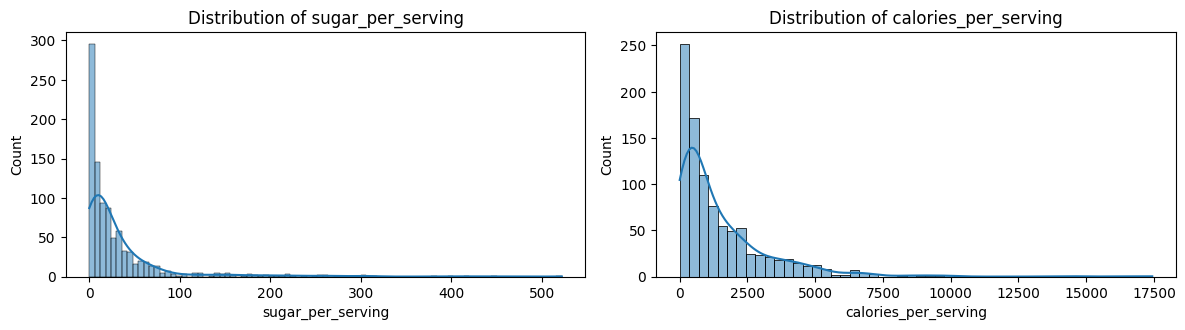

In [ ]:
# Two different types of graphic showing single variables only
plt.figure(figsize=(12, 6))
nutrition = ['sugar', 'calories']  
for i, col in enumerate([f'{col}_per_serving' for col in nutrition]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(recipe_data1[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


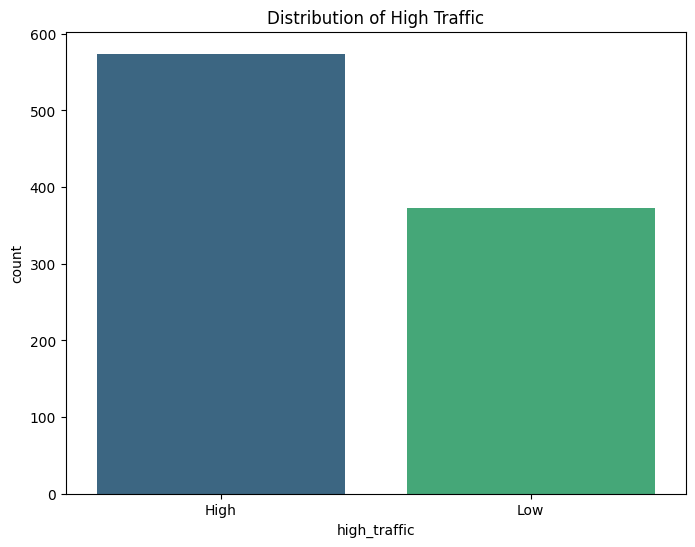

In [ ]:
# Visualization: Distribution of 'high_traffic'
plt.figure(figsize=(8, 6))
sns.countplot(x='high_traffic', data=recipe_data1, hue='high_traffic', palette='viridis')
plt.title('Distribution of High Traffic')
plt.show()

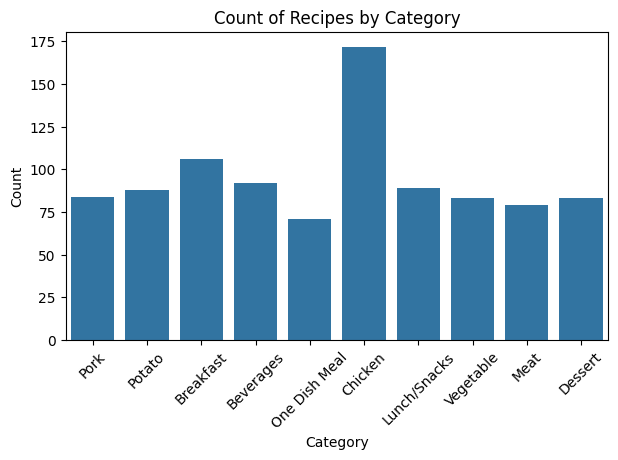

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(x='category', data=recipe_data1)
plt.title('Count of Recipes by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('recipe_category_count.png')
plt.show()

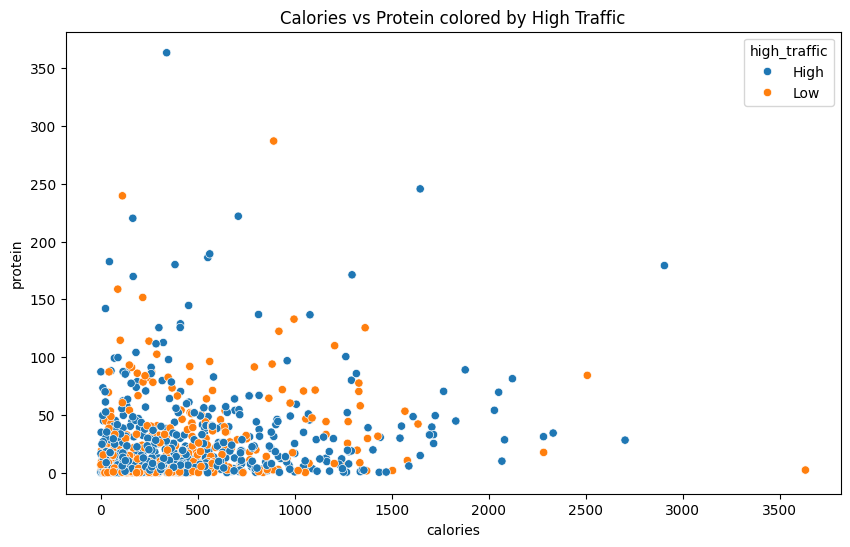

In [ ]:
# Visualization: Scatter plot of calories vs protein
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='protein', hue='high_traffic', data=recipe_data1)
plt.title('Calories vs Protein colored by High Traffic')
plt.show()

C:\Users\Katlego\AppData\Local\Temp\ipykernel_16808\1684447491.py:2: FutureWarning: The provided callable <function mean at 0x0000025907713420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  num_pivot_df = pd.pivot_table(recipe_data1, index=["high_traffic"], values=nutrition_1, aggfunc=np.mean) # values=name,


<Axes: xlabel='high_traffic'>

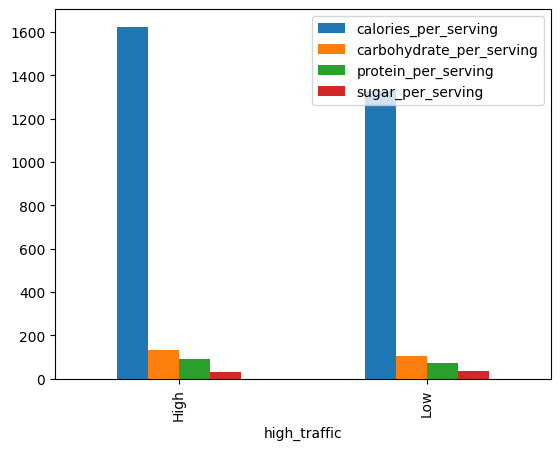

In [ ]:
# df = data_pv.pivot(index='category', columns='gender', values='no_show_prop')
num_pivot_df = pd.pivot_table(recipe_data1, index=["high_traffic"], values=nutrition_1, aggfunc=np.mean) # values=name, 
num_pivot_df.plot(kind='bar')

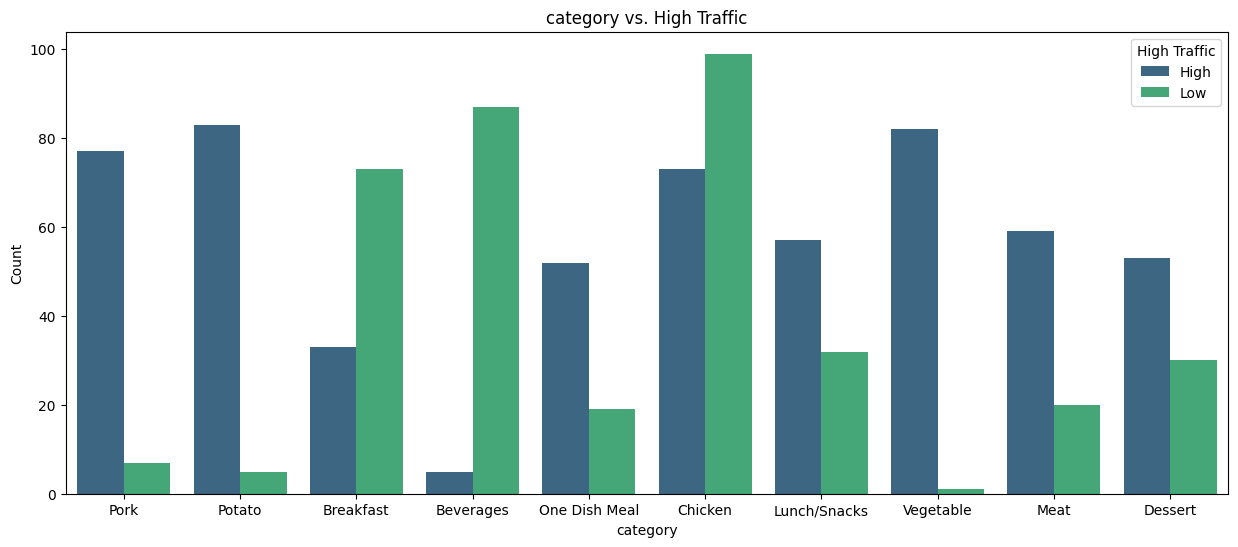

In [ ]:
# Categorical features vs. target variable
categorical_cols = ['category'] 

for feature in categorical_cols:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=recipe_data1, x=feature, hue='high_traffic', palette='viridis')
    plt.title(f'{feature} vs. High Traffic')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='High Traffic')
    plt.show()

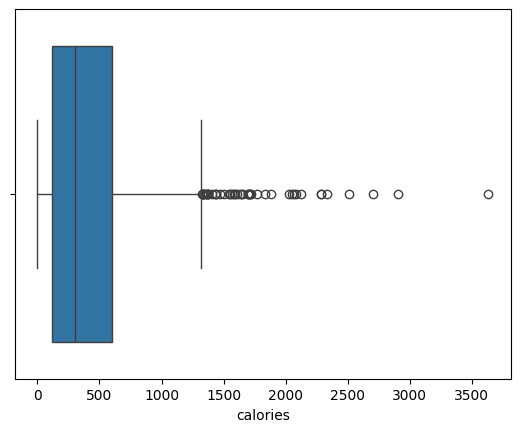

In [ ]:
sns.boxplot(x='calories', data=recipe_data1)
plt.show()

#On the boxplots below I'll check if there are outliers in original numerical features. No, there aren't.

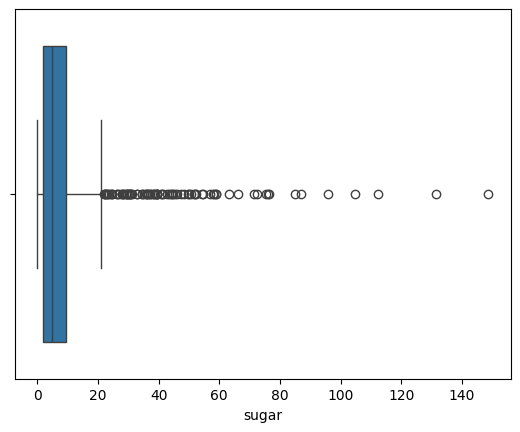

In [ ]:
sns.boxplot(x='sugar', data=recipe_data1)
plt.show()

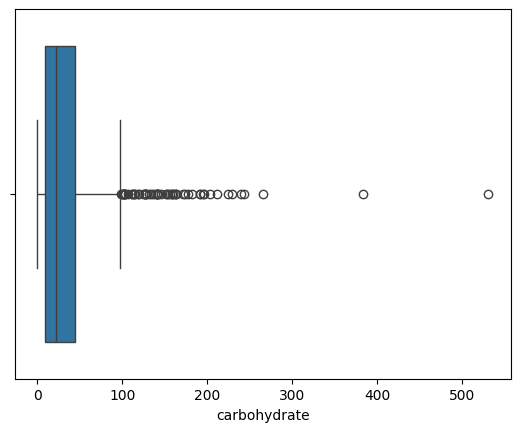

In [ ]:
sns.boxplot(x='carbohydrate', data=recipe_data1)
plt.show()

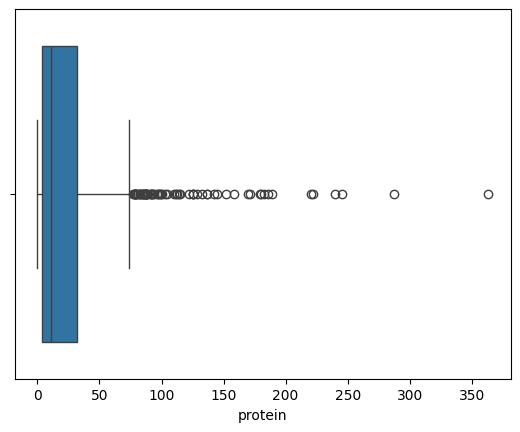

In [ ]:
sns.boxplot(x='protein', data=recipe_data1)
plt.show()

4. MODEL DEVELOPMENT AND EVALUATION 

In [ ]:
# Label encoding and model preparation
label_encoder = LabelEncoder()

In [ ]:
# Assuming 'high_traffic' column contains string labels to predict
y = label_encoder.fit_transform(recipe_data1['high_traffic'])
X = pd.get_dummies(recipe_data1[nutrition + ['category']]).fillna(0)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split into training and testing sets.")

Data split into training and testing sets.


In [ ]:
# Baseline model: Logistic Regression
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Comparison model (for demonstration): RandomForestClassifier
comparison_model = RandomForestClassifier(random_state=42)
comparison_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Model evaluation
baseline_acc = baseline_model.score(X_test, y_test)
comparison_acc = comparison_model.score(X_test, y_test)


print(f"Logistic Regression Model Accuracy: {baseline_acc:.2f}")
print(f"Random Forest Model Accuracy: {comparison_acc:.2f}")


Logistic Regression Model Accuracy: 0.76
Random Forest Model Accuracy: 0.72


Model Definition: Defines features (X) and target (y) for classification.
Model Training: Splits data into training and testing sets, fits logistic regression and random forest models.
Model Evaluation: Evaluates model accuracy using score() method.

5. BUSINESS METRIC DEFINITION AND MONITORING

Let's use accuracy as a metric since it directly measures the model's correctness in predicting high vs. low traffic recipes. 
The business should track the accuracy of the model regularly on new data to ensure it maintains high prediction accuracy.

THE BUSINESS GOALS CAN BE:
Predict Popular Recipes: Develop a model that predicts which recipes will attract high traffic.
Accuracy Goal: Achieve an 80% accuracy in predicting recipes that will lead to high traffic.
Minimise Showing Unpopular Recipes: Minimise the chance of displaying recipes that do not attract high traffic.
Monitoring Metric: Define a metric that allows the business to monitor and evaluate the success of the model in predicting high-traffic recipes.
Recommendations: Provide actionable recommendations based on the model's predictions to improve content strategy and user engagement.


6.  FINAL SUMMARY AND RECOMENDATIONS 

In [ ]:
# Rename the dataframe to recipe_traffic
recipe_data1 = recipe_data1.rename(columns={'high_traffic': 'traffic_level'})


In [ ]:
# Save the cleaned dataset
recipe_data.to_csv('cleaned_recipe_traffic.csv', index=False)


# Final summary including recommendations that the business should undertake 
 Implement regular monitoring of model accuracy to ensure it remains effective.
 Consider exploring more sophisticated models (like RandomForest) or tuning existing models for better performance. 
 Collect more data to improve model robustness and accuracy.


ADJUSTING PROBABILITY THRESHOLD FOR PREDICTION 

In [ ]:
# Predict probabilities for the test set
baseline_probs = baseline_model.predict_proba(X_test)
comparison_probs = comparison_model.predict_proba(X_test)


In [ ]:
# Extract probabilities for class 'High'
baseline_probs_high = baseline_probs[:, 1]
comparison_probs_high = comparison_probs[:, 1]


In [ ]:
# Adjusting threshold for prediction
threshold = 0.8


In [ ]:
# Adjusted predictions based on threshold
baseline_pred_high = (baseline_probs_high >= threshold).astype(int)
comparison_pred_high = (comparison_probs_high >= threshold).astype(int)


In [ ]:
# Calculate accuracy based on adjusted predictions
adjusted_baseline_acc = accuracy_score(y_test, baseline_pred_high)
adjusted_comparison_acc = accuracy_score(y_test, comparison_pred_high)

print(f"Adjusted Baseline Model Accuracy (threshold={threshold}): {adjusted_baseline_acc:.2f}")
print(f"Adjusted Comparison Model Accuracy (threshold={threshold}): {adjusted_comparison_acc:.2f}")


Adjusted Baseline Model Accuracy (threshold=0.8): 0.69
Adjusted Comparison Model Accuracy (threshold=0.8): 0.68


FEASIBILITY AND IMPLICATIONS 